Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Hello World in Neural Networks

## Contents

- iris Classification using Tensorflow & Keras
  - Step 1 - What kind of Neural Network are we building ?
  - Step 2 - How are the neurons connected ?
  - Step 3 - Hidden Layers
  - Step 4 - Output Layer
  - Step 5 - Compile the model
  - Step 6 - Fit the model with training data
  - Step 7 - Predict data
  - Step 8 - Evaluate Model
  - Step 9 - Optimize Model 
- MNIST handwritten digits classification

### iris Classification using Tensorflow

Many times, the MNIST database (a database of handwritten digits) is typically the _Hello World_ application when introducing Neural Networks for the first time. However, we are going to make it even simpler by taking the iris dataset and create a keras based tensorflow Neural Network to classify species. Please refer to <a href="https://ajaytech.co/python-classification/#iris-dataset"> Iris Data </a> to understand more about the dataset we will be working on. You can also refer to <a href="https://ajaytech.co/python-classification"> Classification in Python </a> to understand more about a non-neural network based classification approach to classifying the species in the iris dataset. 

Once you understand how to solve the iris classification problem in Neural Networks, we will move to image recognition. As you will see, structurally there is not a lot of difference in the way we build the neural net for both of these problems.

**This is just a "Hello World" tutorial. It is not intended to teach you the internals of Neural Networks**. With that background, we are now ready to say _hello_ to Neural Networks using Tensorflow.

In [48]:
import tensorflow as tf
from   tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Tensorflow is probably the most popular, open source library from Google that is used to implement Deep Learning. You can build neural networks of any complexity using Tensorflow. However, building a neural net from scratch typically involves defining

- Layers
- Linking the layers
- loss function
- weight adjustments etc

Defining these manually is very time consuming and daunting for newbies. What is needed is an abstract layer above Tensorflow, that makes building neural nets much quicker and easier. 

Keras is the answer. Keras is a high level Python based API that can be used to build neural nets by leveraging Tensorflow. By the way, Tensorflow is not the only deep learning package out there. Here is a quick visual that shows you where Keras and Tensorflow stand in the hierarchy.

<img src="./pics/keras-vs-lower-level-dl-libraries.png"/>

In [49]:
# load iris dataset
from sklearn import datasets
iris = datasets.load_iris()

# preview the iris data
print ( iris.data[0:5,:]  ) # data
print ( iris.target[0:5]  ) # target species

# train/test split @ 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data , iris.target, test_size=0.2)  

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


The following 8 lines of code is all you need to solve the problem. Quickly execute it to see the output for yourself. However, there is quite a lot of explantion to be done here. Let's take it step by step.

In [50]:
model = keras.Sequential()
model.add(keras.layers.Dense(4,input_shape=(4,)))
model.add(keras.layers.Dense(8,activation="relu"))
model.add(keras.layers.Dense(8,activation="relu"))
model.add(keras.layers.Dense(3,activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred

Epoch 1/100
120/120 [==============================] - 0s 521us/sample - loss: 1.6050 - acc: 0.2917
Epoch 2/100
120/120 [==============================] - 0s 37us/sample - loss: 1.5040 - acc: 0.2917
Epoch 3/100
120/120 [==============================] - 0s 33us/sample - loss: 1.4096 - acc: 0.2917
Epoch 4/100
120/120 [==============================] - 0s 29us/sample - loss: 1.3262 - acc: 0.4333
Epoch 5/100
120/120 [==============================] - 0s 29us/sample - loss: 1.2607 - acc: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 29us/sample - loss: 1.2080 - acc: 0.4667
Epoch 7/100
120/120 [==============================] - 0s 33us/sample - loss: 1.1707 - acc: 0.4917
Epoch 8/100
120/120 [==============================] - 0s 29us/sample - loss: 1.1451 - acc: 0.5000
Epoch 9/100
120/120 [==============================] - 0s 33us/sample - loss: 1.1258 - acc: 0.5167
Epoch 10/100
120/120 [==============================] - 0s 62us/sample - loss: 1.1068 - acc: 0.5417
Epoch 11

array([[1.20811760e-02, 3.91645938e-01, 5.96272826e-01],
       [1.69933531e-02, 3.97484392e-01, 5.85522234e-01],
       [9.59960818e-01, 3.92647162e-02, 7.74465443e-04],
       [1.90705255e-01, 6.64598465e-01, 1.44696265e-01],
       [3.11258342e-03, 2.26298794e-01, 7.70588636e-01],
       [8.99805903e-01, 9.60557535e-02, 4.13831137e-03],
       [6.15397003e-03, 2.78556108e-01, 7.15289891e-01],
       [9.58240926e-01, 4.09574024e-02, 8.01660179e-04],
       [8.35558847e-02, 6.37535155e-01, 2.78908908e-01],
       [9.11576152e-01, 8.53549615e-02, 3.06887995e-03],
       [2.80173123e-02, 5.20794570e-01, 4.51188117e-01],
       [9.81949151e-01, 1.78453047e-02, 2.05568867e-04],
       [9.13475394e-01, 8.33630040e-02, 3.16164969e-03],
       [4.98204343e-02, 5.69957256e-01, 3.80222321e-01],
       [2.83193532e-02, 5.36988616e-01, 4.34692025e-01],
       [6.19469536e-03, 2.78104872e-01, 7.15700507e-01],
       [5.04648834e-02, 5.63345432e-01, 3.86189699e-01],
       [9.01798606e-01, 9.46312

#### Step 1 - What type of neural network are we building ?

In [51]:
model = keras.Sequential()

There are two types of Neural networks that can be build in Keras

- Sequential
- Functional

This classification is related to the structure of the Neural Network. However, most of the time you will be using Sequential model. It can solve most of the problems. In a sequential neural net, neurons are arranged in layers and in _sequence_ . The firing and wiring happen in _sequence_, hence the name. Later in the course when we see an example of a functional neural net, the difference will be clear. Here is a quick visual of what we are building.

<img src="./pics/neural-network-layers-sequential.png"/>

Finally, when the network is trained, the outputs corresponding to the species (for the corresponding data points) will light-up. When we look at the last step, we will understand what I meant by _light-up_.

#### Step 2 - How are the neurons connected ?

We are building a **Dense** neural network. 

In [52]:
model.add(keras.layers.Dense(4,input_shape=(4,)))

> A Dense neural network is one in which each neuron is connected to all other neurons in the previous and next layers.

You can see from the visual below that the arrows coming in to each neuron are connected to all the neurons in the previous layer. This is the most typical type of neural network.

<img src="./pics/keras-input-layer.png"/>

Also, with this statement, we are just building the input layer. An input layer with 4 nodes, one node for each of the inputs. Naturally, the assumption at this point would be that there would be as many nodes in the input layer as the number of inputs. So, why specify the **input_shape** parameter again ? In later examples we will see that the input data shape need not always match with the input nodes. We specify the input_shape parameter as a tuple. In this case the input is a 1-d vector. Once again, later in the course we will see examples of 2-d data.

The parameter **input_shape** is only used when creating the first layer. The next set of steps (hidden layer and output layer) do not need this parameter.

#### Step 3 - Hidden Layers

This is where the magic happens. Let's try it with just one hidden layer. 

In [53]:
model.add(keras.layers.Dense(8,activation="relu"))

<img src="./pics/keras-hidden-layer.png"/>

Irrespective of the layer (input, hidden or output), the way to add layers is using the **add** function. That should make things easy for us. The new parameter that you see in the hidden layer is the **activation** parameter. 

<img src="./pics/keras-activation-function.png"/>

In this case, we are using a **relu** activation function. **ReLU** stands for _Rectified Linear Unit_. The mathematical definition of _relu_ is

## $y = max(0,x) $

The output of the activation function looks like this. 

<img src="./pics/relu-activation-function.png"/>

#### Step 4 - Output Layer

After the hidden layer is added, we add the output layer. Since we are doing a multi-class classification, the preferred activation function is called as a softmax - more on this later. A softmax activation function gives out multiple probability values and the one with the highest probability is the predicted output. 

In [54]:
model.add(keras.layers.Dense(3,activation="softmax"))

<img src="./pics/output-layer.png"/>

#### Step 5 - Compile the model

So far, we have created the structure of the neural net - layer by layer. At each step, we have defined the number of nodes and the activation function to be used. Once we have completed it, we now have to compile the model. 

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

So far, we have just defined how the neural net should look like. With the **compile ( )** method, Keras translates the parameters you have specified into an optimized series of steps that can then be executed on the computer. Without the _compile_ step, you cannot fit (train) the model. We will see how we can use metrics in a bit, but optimizer and loss parameters requrie quite a bit of explanation. 

Typically, Machine Learning algorithm requires some kind of a loss function to be minimized. Gradient Descent is a commonly used loss function. For classification problems, a common loss function is **Cross Entropy**. _Cross Entropy_ is also called as **Log Loss**. Mathematically, this is a how a cross entropy function can be defined for 2 classes.

## $L_{Cross Entropy} = -(y \log{p} + (1-y)\log{(1-p)})$

where
- $y$ = actual class
- $p$ = predicted class

Let's look at an example below. Say, we are just looking at 2 species of iris flowers. 

0 - setosa
1 - virginica

If the model has predicted the species to be setosa with a probability of 0.2, the loss function can be calculated as follows. 



## $L_{Cross Entropy} = -(0 \log{0.2} + (1-0)\log{(1-0.2)}) = -(\log{0.8}) = - (-0.096) = 0.096$

Text(0, 0.5, 'Loss function')

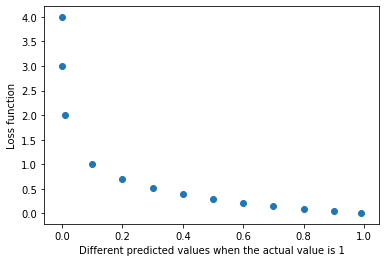

In [56]:
import numpy as np

p = np.array([0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

# when y = 1, what is the loss function ?
y = 1
l = - (y * np.log10(p) + (1-y) * np.log10(1-p)  )

# now plot it to see how the loss function decreases as the predicted value approaches the actual value (of y = 1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(p,l)
plt.xlabel("Different predicted values when the actual value is 1")
plt.ylabel("Loss function")


What this plot means is that the more the predicted value deviates from the actual value, the more the loss function is. For example, when the predicted value reaches close to the actual value (of 1 in this case), the loss function gets closer and closer to 0. 

At this point, you can see a quick summary of the model you have created so far

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


#### Step 6 - Fit the model with training data

This is where we train the dataset. The word **epoch** represents one complete iteration over the training dataset. With each epoc (one pass over the entire dataset) the weights are adjusted and the accuracy slowly increases. Since you have _accuracy_ as a metric in step 5, it is shown at each of the training epoch. That way you see how the accuracy increases with each epoch.

In [58]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 446us/sample - loss: 1.6451 - acc: 0.2167
Epoch 2/100
120/120 [==============================] - 0s 33us/sample - loss: 1.5703 - acc: 0.2750
Epoch 3/100
120/120 [==============================] - 0s 29us/sample - loss: 1.5049 - acc: 0.3083
Epoch 4/100
120/120 [==============================] - 0s 29us/sample - loss: 1.4404 - acc: 0.3083
Epoch 5/100
120/120 [==============================] - 0s 29us/sample - loss: 1.3812 - acc: 0.3167
Epoch 6/100
120/120 [==============================] - 0s 41us/sample - loss: 1.3288 - acc: 0.3333
Epoch 7/100
120/120 [==============================] - 0s 33us/sample - loss: 1.2814 - acc: 0.3333
Epoch 8/100
120/120 [==============================] - 0s 37us/sample - loss: 1.2384 - acc: 0.3417
Epoch 9/100
120/120 [==============================] - 0s 33us/sample - loss: 1.2007 - acc: 0.3417
Epoch 10/100
120/120 [==============================] - 0s 29us/sample - loss: 1.1680 - acc: 0.3500
Epoch 11

After finishing 100 epochs, the accuracy is around 69% - not bad for our first attempt. We will enhance it shortly to 90% by just adding one more hidden layer. 

#### Step 7 - Predict data

Now that the model is trained, you can start predicting your test data. This step is pretty straight forward if you have already used sklearn to predict test data based on any machine learning model.

In [59]:
y_pred = model.predict(X_test)
y_pred

array([[4.80523752e-03, 1.61355630e-01, 8.33839059e-01],
       [5.65165561e-03, 1.38419360e-01, 8.55928957e-01],
       [9.37631130e-01, 5.78489937e-02, 4.51981043e-03],
       [9.99230742e-02, 7.17553735e-01, 1.82523206e-01],
       [9.50973015e-04, 1.86273277e-01, 8.12775731e-01],
       [8.69464993e-01, 1.15551665e-01, 1.49833458e-02],
       [6.78034406e-03, 2.44014740e-01, 7.49204934e-01],
       [9.12608325e-01, 8.10388103e-02, 6.35283068e-03],
       [6.19196370e-02, 7.35043049e-01, 2.03037351e-01],
       [8.91312957e-01, 9.75011438e-02, 1.11858230e-02],
       [1.72961298e-02, 3.84219527e-01, 5.98484337e-01],
       [9.59164917e-01, 3.88094820e-02, 2.02561123e-03],
       [9.01787043e-01, 8.78127143e-02, 1.04002040e-02],
       [4.25860547e-02, 4.14889425e-01, 5.42524457e-01],
       [2.64684074e-02, 6.92561448e-01, 2.80970186e-01],
       [3.44479713e-03, 2.71285832e-01, 7.25269318e-01],
       [4.74239029e-02, 6.01970136e-01, 3.50605994e-01],
       [8.60095024e-01, 1.25155

Since this is a multi-class output, what the neural net outputs are probabilities. The highest probability among the three elements is the predicted value. However, we need to convert these probabilities back to indices. 

<img src="./pics/np-argmax.png"/>

In [60]:
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 2], dtype=int64)

#### Step 8 - Evaluate Model

Since the output is categorical data, a quick confusion matrix will show use how far we are from the model. Use scikit learn's confusion matrix should do.

In [61]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred_class)
print ( cm )

[[15  0  0]
 [ 0  5  1]
 [ 0  0  9]]


And of course the final number - accuracy. 

In [62]:
from sklearn.metrics import accuracy_score
 
accuracy_score(y_test,y_pred_class)

0.9666666666666667

That is pretty low by any Machine Learning standards for this dataset. Let's optimize it.

#### Step 9 - Optimize Model

There are a couple of ways to optimize for higher accuracy. One way is to increase the nodes in the hidden layer. Let's try to increase the number of nodes from 8 to 20 and see how the network performs. 

In [63]:
model = keras.Sequential()
model.add(keras.layers.Dense(4,input_shape=(4,)))
# BEGIN change - increase the number of nodes from 8 to 20
model.add(keras.layers.Dense(20,activation="relu"))
# END change
model.add(keras.layers.Dense(3,activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

from sklearn.metrics import accuracy_score
 
accuracy_score(y_test,y_pred_class)

Epoch 1/100
120/120 [==============================] - 0s 484us/sample - loss: 1.9111 - acc: 0.2917
Epoch 2/100
120/120 [==============================] - 0s 29us/sample - loss: 1.7657 - acc: 0.2917
Epoch 3/100
120/120 [==============================] - 0s 33us/sample - loss: 1.6348 - acc: 0.2917
Epoch 4/100
120/120 [==============================] - 0s 33us/sample - loss: 1.5117 - acc: 0.2917
Epoch 5/100
120/120 [==============================] - 0s 33us/sample - loss: 1.4100 - acc: 0.2917
Epoch 6/100
120/120 [==============================] - 0s 33us/sample - loss: 1.3202 - acc: 0.2917
Epoch 7/100
120/120 [==============================] - 0s 29us/sample - loss: 1.2427 - acc: 0.2917
Epoch 8/100
120/120 [==============================] - 0s 33us/sample - loss: 1.1696 - acc: 0.2917
Epoch 9/100
120/120 [==============================] - 0s 45us/sample - loss: 1.1183 - acc: 0.2917
Epoch 10/100
120/120 [==============================] - 0s 37us/sample - loss: 1.0729 - acc: 0.4083
Epoch 11

0.9666666666666667

We have now hit 90% accuracy. That's pretty much close to what most ML models would achieve. Let's try to keep the number of nodes the same, but add one more hidden layer. 

In [64]:
model = keras.Sequential()
model.add(keras.layers.Dense(4,input_shape=(4,)))
model.add(keras.layers.Dense(8,activation="relu"))
# BEGIN Change - add one more hidden layer
model.add(keras.layers.Dense(8,activation="relu"))
# END Change

model.add(keras.layers.Dense(3,activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)

from sklearn.metrics import accuracy_score
 
accuracy_score(y_test,y_pred_class)

Epoch 1/100
120/120 [==============================] - 0s 574us/sample - loss: 1.9741 - acc: 0.2333
Epoch 2/100
120/120 [==============================] - 0s 33us/sample - loss: 1.8711 - acc: 0.3417
Epoch 3/100
120/120 [==============================] - 0s 33us/sample - loss: 1.7824 - acc: 0.3417
Epoch 4/100
120/120 [==============================] - 0s 33us/sample - loss: 1.7114 - acc: 0.3417
Epoch 5/100
120/120 [==============================] - 0s 46us/sample - loss: 1.6428 - acc: 0.3417
Epoch 6/100
120/120 [==============================] - 0s 37us/sample - loss: 1.5780 - acc: 0.3417
Epoch 7/100
120/120 [==============================] - 0s 33us/sample - loss: 1.5234 - acc: 0.3417
Epoch 8/100
120/120 [==============================] - 0s 37us/sample - loss: 1.4688 - acc: 0.3417
Epoch 9/100
120/120 [==============================] - 0s 54us/sample - loss: 1.4162 - acc: 0.3417
Epoch 10/100
120/120 [==============================] - 0s 29us/sample - loss: 1.3703 - acc: 0.3417
Epoch 11

0.9333333333333333

That's 80% accuracy. The immediate question you might have is - How should you choose the number of nodes or the number of hidden layers ? Unfortunately, the meaning of weights and outputs is essentially a blackbox to humans. Meaning, we cannot make any sense out of it. 

> Choosing the size and complexity of a neural network (like the numbner of nodes and the number of hidden layers) is more art than science

## MNIST handwritten digits classification

If all we had to do in Neural Networks was classify iris data, we wouldn't be needing Neural networks to start with. We need a more involved dataset to quality as a "Hello World" program in Neural Networks. Welcome the MNIST digits dataset. It is a dataset of handwritten images that are scanned, standardized and optimized for machine learning. Tensorflow comes built-in with this dataset. Let's quickly load it to see how these images look like.

In [65]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# load the data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

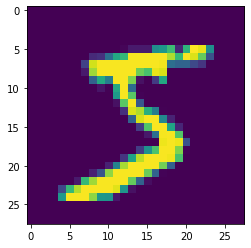

In [67]:
# Show the first picture in the training dataset.
plt.figure()
plt.imshow(train_images[0])

It is a handwritten digit - 5. Although the image looks in color, these are actually gray-scale images. All of the data is standardized into 28x28 pixels. And each pixel has an intensity value between 0 and 255 ( 0 - 2<sup>8</sup> ). Since this is a small image (just 28x28 pixels), we can write it to an excel file and see the numbers visually.

In [68]:
# write the first image to a csv file.
np.savetxt("image_1.csv",train_images[0],delimiter=",")

PermissionError: [Errno 13] Permission denied: 'image_1.csv'

If you open the csv file in excel, and adjust the column size and change the number format to zero decimals, you should see a picture like this. Can you identify the digit 5 in there ?

<img src="./pics/mnist-image-in-excel.png"/>

Confirm that the image is in fact a 5.

In [ ]:
# Print the first label
train_labels[0]

Prepare the model. The first layer in this case is slightly different from the first layer in the iris example above. As you can see from the input image data, it is a 28x28 dimension numpy array. However, we are going to be working with flat (a flat set of neurons in each layer). So, the first layer will be essentially a 784 (28 x 28 = 784) node layer that will be created automatically by flattening the input array. 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

<img src="./pics/keras-flatten.png"/>

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=6)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(test_images)

The prediction is a vector of 10 x 1 dimension of probabilities. The value with the highest probability in the output array is the predicted value. For example, let's see what is the first image in the test_image. 

In [ ]:
test_labels[0]

It is a 7. Let's see how the probabilities are predicted.

In [ ]:
np.savetxt("predictions.csv",predictions[0:10],delimiter=",")

In [ ]:
predicted_final[0:10]

You can see from the array above that the highest probability value is at location 7. Let's apply the argmax function of numpy to just filter out the values with the highest probability into a new array. For example, the first output array has an **argmax** output of 7 ( **argmax ( )** outputs the index of the highest element in a numpy array).

<img src="./pics/argmax.png"/>

Let's apply the argmax on the output array to predicted array.

In [ ]:
predicted_final = np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
 
accuracy_score(test_labels,predicted_final)

That's a 95% accuracy on the test datasets.

Great !! Our "Hello World" of Neural Networks is complete. The next couple of days we will focus on the moving parts of a neural network and how Gradient Descent is used in Neural networks to optimize the weights. This is how the neural network essentially learns.